# T03: X-Ray Classifier
---

A lo largo de este archivo se describen distintas estrategias para hacer la clasificación. 

Cada estrategia debe contar con los siguientes elementos:

    1. Caracteristicas extraídas.
    2. Selección y transformación de características.
    3. Clasificador utilizado.
    
---
### -Imports

In [198]:
# manejo de imagenes
from pybalu import feature_extraction, img_processing, io
from skimage import io, exposure
import numpy as np
import cv2


# utilidades
import os

## 1) Load and prepare dataset:

### - Image processing:
Estos son procesamientos adicionales que se pueden hacer y serán estudiados en pos de los scores en la clasificación:

In [3]:
def increase_contrast(img, low_p=0.1, high_p=99.9):
    # aumenta el contraste en la imagen
    v_min, v_max = np.percentile(img, (low_p, high_p))
    return exposure.rescale_intensity(img, in_range=(v_min, v_max))

def load_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    contrasted_img = increase_contrast(img)
    return contrasted_img

### - Loading datasets:
Las imagenes cargadas son guardadas en archivos ```.npy```.

In [4]:
def load_dataset(datadir, dirname, extension='.png', load=True):
    data_path = os.path.join(datadir, dirname)
    dataset_file, labels_file = f'{dirname}_dataset.npy', f'{dirname}_labels.npy'
    
    # si los archivos no están guardados
    previously_loaded = set([dataset_file, labels_file]).issubset(set(os.listdir(datadir)))
    if (not previously_loaded) or (not load):
        imgs, labels = [], []  # contenedor

        # recorremos cada carpeta con archivos
        cdirs = [cdir for cdir in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, cdir))]
        for cdir in sorted(cdirs):
            cimgs, clabels = [], []  # contenedor para cada clase

            # recorremos cada archivo
            files = [file for file in os.listdir(os.path.join(data_path, cdir)) if extension in file]            
            for file in sorted(files):
                cimgs.append(load_image(os.path.join(data_path, cdir, file)))
                clabels.append(file[4:-4])  # nnnn_pppp
        
            # agregamos a la lista
            imgs.append(cimgs), labels.append(clabels)
        
        # transformamos a array
        dataset, labels = np.array(imgs), np.array(labels)
        
        # guardamos en archivos
        np.save(f'{os.path.join(datadir, dataset_file)}', dataset)
        np.save(f'{os.path.join(datadir, labels_file)}', labels)

    # si los archivos ya están guardados
    else:
        # se cargan los archivos
        dataset = np.load(os.path.join(datadir, dataset_file), allow_pickle=True)
        labels = np.load(os.path.join(datadir, labels_file), allow_pickle=True)
    
    # se retornan los archivos
    return dataset, labels

In [171]:
training_dataset, training_labels = load_dataset('dataset', 'training', load=False)
testing_dataset, testing_labels = load_dataset('dataset', 'testing', load=False)

---

## 2) Feature Extraction:

Cada sección se va a dedicar a tipos de caracteristicas diferentes:

In [168]:
def extract_countours(img):
    gray = cv2.bilateralFilter(img, 11, 17, 17)
    edged = cv2.Canny(gray, 30, 200)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    io.imshow(edged)
    return contours

### - Geometric Features:

    - Features Consideradas: Se debe considerar que cada *patch* son de la misma escala porque podemos ocupar features variantes a la escala. Las imagenes son tomadas de partes aleatoreas de una imágen más grande, por lo que por ahora no se consideraran features variantes a la traslación.
    
        1. Perímetro.
        2. Área.
        3. Roundness.
        4. HuMoments.
        5. Fourier Descriptors.

In [199]:
def contourFeatures(contours):
    perimeters = []
    areas = []
    roundness = []
    for cnt in contours:
        length = cv2,arcLength(cnt, closed=False)
        area = cv2.contourArea(cnt, closed=True)
        # agregamos a la listas de la imagen
        perimeter.append(length)
        areas.append(area)
        roundness.append((4 * area * np.pi) / (area) ** 2)

    # numero de contornos, perimetro, area, roundness
    return len(countours), perimeters, areas, roundness

def HuMoments(cnt):
    # momentos
    moments = cv2.moments(cnt)
    return cv2.HuMoments(moments)

def FourierDescriptors(img):
    # binarización de la imagen
    binary_img, _, _ = img_processing.segbalu(img)
    return feature_extraction.fourier_des_features(binary_img)

### - Texture Features:

In [205]:
img = training_dataset[0][4]
binary_img, _, _ = img_processing.segbalu(img)

FourierDescriptors(img)

array([2.42934009, 0.97866669, 0.50000761, 0.27121397, 0.38190053,
       0.4292876 , 0.03950349, 0.26389903, 0.31851659, 0.13901886,
       0.08239852, 0.09106509, 0.19302278, 0.08159675, 0.08985048,
       0.12005784])

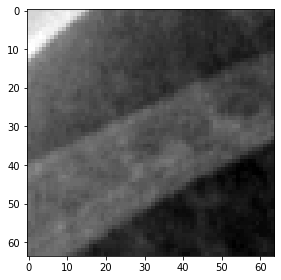

In [209]:
io.imshow(img)